## Pre-processing d'un texte : 
* Objectif : nettoyage de la Data
* Cas du discours d'un président

## Word Cloud

In [1]:
# installation des librairies
!pip install nltk stopwords num2words wordcloud Pillow

## Packages

In [14]:
!pip install num2words
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from num2words import num2words
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords') 
from nltk.corpus import stopwords

### Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

import numpy as np
import pandas as pd


nltk.download('punkt') # modèle lingustique supplémentaire pour éviter les messages d'erreurs

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# Importation du discours de macron
Doc = open(r'DiscoursMacron.txt', 'r', encoding='utf-8')
Disc = Doc.readlines() 
Disc = " ".join(Disc)
Disc

"Françaises, Français,\n Mes chers compatriotes de métropole, d'outre-mer et de l'étranger.\n À l'issue d'une longue confrontation démocratique, vous avez choisi de m'accorder votre confiance et je tiens à vous exprimer ma profonde gratitude. C'est un grand honneur et c'est une grande responsabilité. Car rien n'était écrit. Je veux vous dire merci. Merci du fond du c\x9cur.\n Ma gratitude va à tous ceux d'entre vous qui m'ont apporté leur suffrage et leur soutien. Je ne vous oublierai pas. Je mettrai tout mon soin et toute mon énergie à être digne de votre confiance.\n Mais en cet instant, c'est à vous tous, citoyens de notre pays, que je veux m'adresser, quel qu'ait été votre choix.\n Bien des difficultés nous ont affaiblis depuis trop longtemps. Je ne méconnais aucune, ni les difficultés économiques, ni les fractures sociales, ni les impasses démocratiques, ni l'affaiblissement moral du pays.\n Je veux ce soir adresser un salut républicain à mon adversaire, Madame LE PEN.\n Je sais l

* Tokenisation

In [16]:
from nltk.tokenize import word_tokenize
nltk.download('stopwords')  
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Découpage du texte en mot unique pour permettre aux modèles de machines learning de bien travailler
Disc = word_tokenize(Disc)
Disc

['Françaises',
 ',',
 'Français',
 ',',
 'Mes',
 'chers',
 'compatriotes',
 'de',
 'métropole',
 ',',
 "d'outre-mer",
 'et',
 'de',
 "l'étranger",
 '.',
 'À',
 "l'issue",
 "d'une",
 'longue',
 'confrontation',
 'démocratique',
 ',',
 'vous',
 'avez',
 'choisi',
 'de',
 "m'accorder",
 'votre',
 'confiance',
 'et',
 'je',
 'tiens',
 'à',
 'vous',
 'exprimer',
 'ma',
 'profonde',
 'gratitude',
 '.',
 "C'est",
 'un',
 'grand',
 'honneur',
 'et',
 "c'est",
 'une',
 'grande',
 'responsabilité',
 '.',
 'Car',
 'rien',
 "n'était",
 'écrit',
 '.',
 'Je',
 'veux',
 'vous',
 'dire',
 'merci',
 '.',
 'Merci',
 'du',
 'fond',
 'du',
 'c\x9cur',
 '.',
 'Ma',
 'gratitude',
 'va',
 'à',
 'tous',
 'ceux',
 "d'entre",
 'vous',
 'qui',
 "m'ont",
 'apporté',
 'leur',
 'suffrage',
 'et',
 'leur',
 'soutien',
 '.',
 'Je',
 'ne',
 'vous',
 'oublierai',
 'pas',
 '.',
 'Je',
 'mettrai',
 'tout',
 'mon',
 'soin',
 'et',
 'toute',
 'mon',
 'énergie',
 'à',
 'être',
 'digne',
 'de',
 'votre',
 'confiance',
 '.',


In [18]:
# Utilisation de numpy pour remplacer les virgule par les blancs ou espace
Disc = np.char.replace(Disc, ',', '')
Disc

array(['Françaises', '', 'Français', '', 'Mes', 'chers', 'compatriotes',
       'de', 'métropole', '', "d'outre-mer", 'et', 'de', "l'étranger",
       '.', 'À', "l'issue", "d'une", 'longue', 'confrontation',
       'démocratique', '', 'vous', 'avez', 'choisi', 'de', "m'accorder",
       'votre', 'confiance', 'et', 'je', 'tiens', 'à', 'vous', 'exprimer',
       'ma', 'profonde', 'gratitude', '.', "C'est", 'un', 'grand',
       'honneur', 'et', "c'est", 'une', 'grande', 'responsabilité', '.',
       'Car', 'rien', "n'était", 'écrit', '.', 'Je', 'veux', 'vous',
       'dire', 'merci', '.', 'Merci', 'du', 'fond', 'du', 'c\x9cur', '.',
       'Ma', 'gratitude', 'va', 'à', 'tous', 'ceux', "d'entre", 'vous',
       'qui', "m'ont", 'apporté', 'leur', 'suffrage', 'et', 'leur',
       'soutien', '.', 'Je', 'ne', 'vous', 'oublierai', 'pas', '.', 'Je',
       'mettrai', 'tout', 'mon', 'soin', 'et', 'toute', 'mon', 'énergie',
       'à', 'être', 'digne', 'de', 'votre', 'confiance', '.', 'Mais',
   

In [19]:
# Maintenant, on enlève les espaces
Disc = list(filter(None, Disc))
Disc

['Françaises',
 'Français',
 'Mes',
 'chers',
 'compatriotes',
 'de',
 'métropole',
 "d'outre-mer",
 'et',
 'de',
 "l'étranger",
 '.',
 'À',
 "l'issue",
 "d'une",
 'longue',
 'confrontation',
 'démocratique',
 'vous',
 'avez',
 'choisi',
 'de',
 "m'accorder",
 'votre',
 'confiance',
 'et',
 'je',
 'tiens',
 'à',
 'vous',
 'exprimer',
 'ma',
 'profonde',
 'gratitude',
 '.',
 "C'est",
 'un',
 'grand',
 'honneur',
 'et',
 "c'est",
 'une',
 'grande',
 'responsabilité',
 '.',
 'Car',
 'rien',
 "n'était",
 'écrit',
 '.',
 'Je',
 'veux',
 'vous',
 'dire',
 'merci',
 '.',
 'Merci',
 'du',
 'fond',
 'du',
 'c\x9cur',
 '.',
 'Ma',
 'gratitude',
 'va',
 'à',
 'tous',
 'ceux',
 "d'entre",
 'vous',
 'qui',
 "m'ont",
 'apporté',
 'leur',
 'suffrage',
 'et',
 'leur',
 'soutien',
 '.',
 'Je',
 'ne',
 'vous',
 'oublierai',
 'pas',
 '.',
 'Je',
 'mettrai',
 'tout',
 'mon',
 'soin',
 'et',
 'toute',
 'mon',
 'énergie',
 'à',
 'être',
 'digne',
 'de',
 'votre',
 'confiance',
 '.',
 'Mais',
 'en',
 'cet',


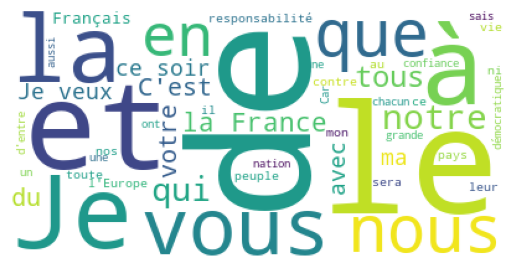

In [20]:
from wordcloud import WordCloud
# Start with one review:
text = Disc
text = " ".join(text)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = 'white', stopwords = None, max_words = 50).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

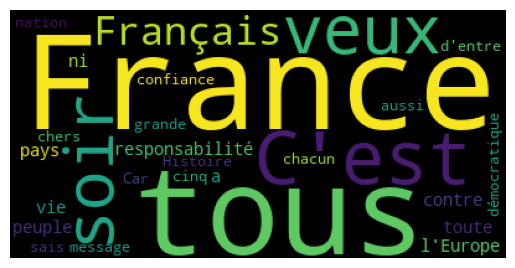

In [21]:
# Suppression des stopword 
StopWord = stopwords.words('french')
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = 'black', stopwords = StopWord, max_words = 50, min_font_size = 12).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
# Customisation des stop words: 
stop = ['soir', 'pays', "c'es"]

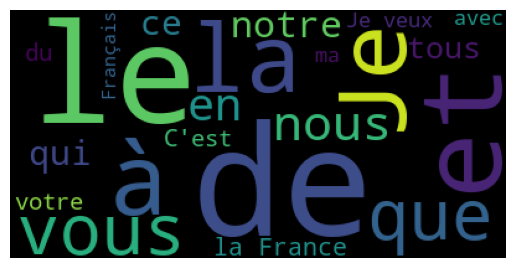

In [23]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = 'black', stopwords = stop, max_words = 50, min_font_size = 12).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Analyse des fréquences : Vectorisation

In [24]:
import collections
import pandas as pd
CountWord = collections.Counter(Disc)
DfCountWord = pd.DataFrame(CountWord.most_common(15), columns = ["Mots", "Occurence"])# 15 mots les plus fréquents
DfCountWord

,Mots,Occurence
0,.,47
1,de,36
2,et,25
3,les,24
4,la,23
5,à,18
6,Je,16
7,des,14
8,le,14
9,vous,12


Text(0.5, 1.0, 'Fréquences')

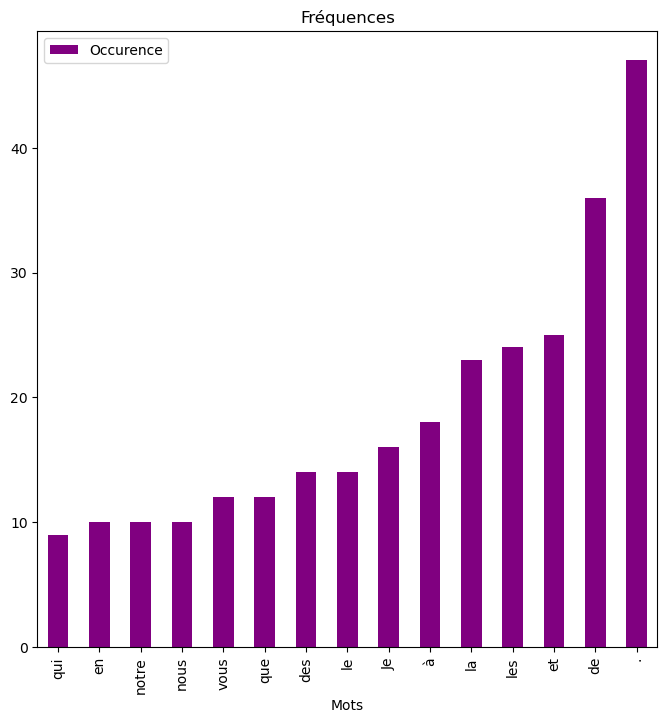

In [25]:
# représentation graphiques des fréquences
fig, ax = plt.subplots(figsize=(8, 8))
DfCountWord.sort_values(by='Occurence').plot.bar(x='Mots',
                      y='Occurence',
                      ax=ax,
                      color="purple")
plt.title("Fréquences")

# lower_case : conversion en minuscule

In [27]:
def lower_case(data):
    return np.char.lower(data)

Sentence = "I am doing NLP now! This is of great interest..."
lower_case(Sentence)

array('i am doing nlp now! this is of great interest...', dtype='<U48')

In [28]:
def remove_stop_words(data):
    stop_words = stopwords.words('english') 
    words = word_tokenize(str(data))
    new_text = " "
    for w in words:
        if w not in stop_words and len(w)>1: 
            new_text = new_text + " " + w 
    return new_text 
Sentence = "I am doing NLP now! This is of great interest..."
remove_stop_words(Sentence)

'  NLP This great interest ...'

In [34]:
# définition d'une fonction pour supprimer la ponctuation

def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n" 
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ') 
        data = np.char.replace(data, "  ", " ") 
    data = np.char.replace(data, ',', '') 
    return data

Sentence = "I'm doing NLP now!!! This  is of great interest..."
remove_punctuation(Sentence)

<>:4: SyntaxWarning: invalid escape sequence '\]'
<>:4: SyntaxWarning: invalid escape sequence '\]'
C:\Users\cleme\AppData\Local\Temp\ipykernel_22492\388788242.py:4: SyntaxWarning: invalid escape sequence '\]'
  symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"


array("I'm doing NLP now This is of great interest ", dtype='<U44')

In [35]:
# Suppression Apostrophes

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

Sentence = "I'm doing NLP now! This is of great interest..."

remove_apostrophe(Sentence)

array('Im doing NLP now! This is of great interest...', dtype='<U46')

# Stemming : 
* le stemming (ou racinisation) est une technique de prétraitement de texte en NLP qui consiste à réduire un mot à sa racine (ou forme canonique) en supprimant ses affixes (suffixes, préfixes).

In [36]:
def stemming(data):
    stemmer= PorterStemmer()
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

stemming(Sentence)

" i 'm do nlp now ! thi is of great interest ..."

In [37]:
# Convert numbers

def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            pass
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ") 
    return new_text

Sentence = "I'm earning 29 dollars a day now and not 0 !" 
convert_numbers(Sentence)


array(" I 'm earning twenty nine dollars a day now and not zero !",
      dtype='<U58')

In [38]:
# Lemmatization

lemmatizer=WordNetLemmatizer()

def lemmatize(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + lemmatizer.lemmatize(w)
    return new_text

Sentence = "I have earned 10000 dollars a day !"  # => 's' should be replaced but not ed to keep some context

lemmatize(Sentence)

' I have earned 10000 dollar a day !'

## Définition d'une fonction pour appliquer tous les traitements vus précédemment

In [39]:
lemmatizer=WordNetLemmatizer()
def preprocess(data):
    data = convert_numbers(data)
    data = lower_case(data)
    data = remove_punctuation(data)
    data = remove_apostrophe(data)
    #data = remove_stop_words(data)
    #data = stemming(data)
    data = lemmatize(data)
    return data

Sentence = "I'm earning 10000 dollars a day now !"

preprocess(Sentence)

' i m earning ten thousand dollar a day now'

## Cas pratique sur un corpus contenant les décisions de justices.
* l'objectif est de voir si le juge a accepté ou refusé la demande relative à l'article 700.

In [40]:
# Chargement de la base 
base = pd.read_excel('ART_700.xlsx')

In [41]:
base.describe()

,art_700,resultat
count,1994.000000,1994.000000
mean,0.517553,0.405216
std,0.499817,0.491057
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [42]:
# extraction des phrases de prétentions, et l'article 700 (résultat) : 1 demande acceptée et 0 non 
base_f = base[['phrase pretention', 'art_700']] 
base_f = base_f.copy()
base_f.dropna(how='any', inplace=True) 
print(base_f.shape)
base_f

(1956, 2)


,phrase pretention,art_700
0,sauf du chef de la demande au titre de l'artic...,1
1,- de condamner le GAEC DES FRESNES au paiement...,1
2,de le condamner à lui verser la somme de 2 000...,1
3,- condamner Madame E... C... au paiement de la...,1
4,Condamner Mme Exposito à lui verser une somme ...,1
...,...,...
1989,débouter Mme B... de l'ensemble de ses demandes,0
1990,divorce pour altération définitive du lien con...,0
1991,fixer la part contributive du père à la somme ...,0
1992,condamner SM Europe à lui verser la somme de ...,1


In [43]:
# Creation d'un corpus qui va concater ou empiler toutes les dphrases de prétentions
corpus = [] 
for sentences in base_f['phrase pretention'] : 
    corpus.append(sentences) 
y = np.asarray(base_f['art_700'])  # 1 acceptation, 0 refus

In [44]:
# Preprocessing sur le corpus
processed_text = []
for i,sentences in enumerate (corpus): 
    processed_text.append(preprocess(sentences))
print(processed_text)


[' sauf du chef de la demande au titre de larticle seven hundred du code de procédure civile portée à la somme de 5 000 euro', ' de condamner le gaec de fresnes au paiement de la somme de 3 000 euro en application de larticle seven hundred du code de procédure civile', ' de le condamner à lui verser la somme de two zero ¿ en application de larticle seven hundred du code de procédure civile', ' condamner madame e c au paiement de la somme de three zero ¿ sur le fondement de larticle seven hundred du code de procédure civile', ' condamner mme exposito à lui verser une somme de two thousand de procédure civile sur le fondement de larticle seven hundred du code', ' condamner m barreneche à five thousand dindemnité sur le fondement de larticle seven hundred du code de procédure civile et aux entiers dépens lesquels seront directement recouvrés par la scp marbot crépin', ' condamner lappelante et m a in solidum au paiement de cette indemnité ainsi quau paiement de la somme de five thousand e

* Word cloud 

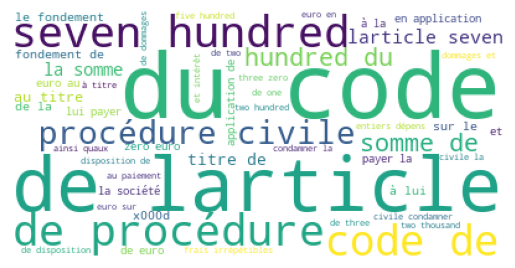

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = processed_text
text = " ".join(text)

wordcloud = WordCloud(background_color = 'white', stopwords = None, max_words = 50).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Vectorisation du corpus contenant les décisions de justices
* Méthode TF-IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# Paramétrage des hyperparamètres
vectorizer = TfidfVectorizer(ngram_range = (1,2), max_df = 0.99, min_df = 0.01, max_features=500, norm = 'l2', binary = False)
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.shape
df

,00,00 euros,000,000 00,000 au,000 en,000 euros,000 sur,000 titre,10,...,un,une,une indemnité,une somme,verser,verser la,époux,état,état de,être
0,0.0,0.0,0.159212,0.0,0.000000,0.000000,0.213810,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.124844,0.0,0.000000,0.000000,0.167656,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.123939,0.0,0.000000,0.275291,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.235304,0.267873,0.0,0.0,0.0,0.0
3,0.0,0.0,0.129831,0.0,0.000000,0.000000,0.000000,0.293754,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.181048,0.0,0.231324,0.230303,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1952,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1953,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1954,0.0,0.0,0.099639,0.0,0.204079,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.189169,0.215352,0.0,0.0,0.0,0.0


In [ ]:
# Régression logistique pour prédire si les demandes relatives à l'article 700 ont été acceptées (1) ou refusée (0)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Définition  X
X = np.asarray(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1)

clf = LogisticRegression(penalty="l1", tol=0.01, solver="saga")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf,':')
print('Accuracy :', accuracy_score(y_test, y_pred))
print('F-measure by class', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('')

LogisticRegression(penalty='l1', solver='saga', tol=0.01) :
Accuracy : 0.9617346938775511
F-measure by class 0.9606299212598425
[[194   4]
 [ 11 183]]



In [ ]:
# Ces résultats indiquent que le modèle est capable de différencier de manière fiable les décisions favorables et défavorables sur l’article 700, à partir des seules données textuelles.

In [51]:
coeffs = clf.coef_[0] 
selected_features = np.array(feature_names)[coeffs != 0]

# Affichage les mots sélectionnés
print("Mots sélectionnés par la régression (coefficient non nul) :")
print(selected_features)

Mots sélectionnés par la régression (coefficient non nul) :
['500' '700' '700 du' '_x000d_' 'ainsi' 'appel' 'article' 'article 700'
 'avocat' 'condamnation' 'condamner' 'de' 'de 000' 'de article'
 'de procédure' 'dépens' 'dépens avec' 'et appel' 'frais'
 'frais irrépétibles' 'indemnité' 'instance et' 'intérêts' 'irrépétibles'
 'le condamner' 'lui payer' 'payer' 'procédure' 'somme de' 'une indemnité']


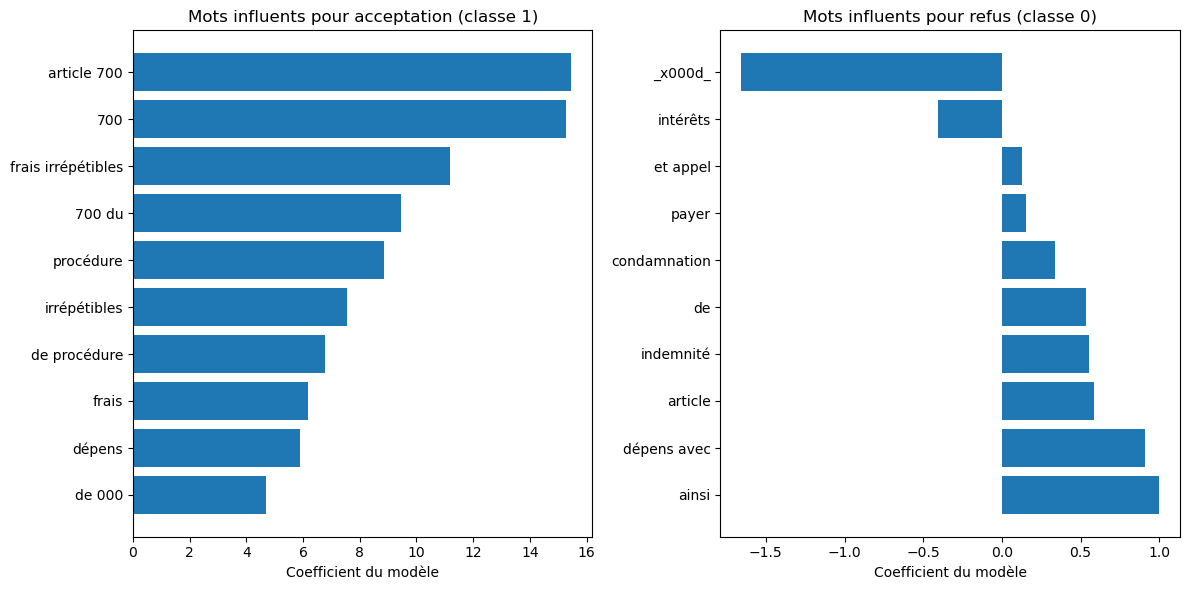

In [52]:
# Extraction des coefficients
coeffs = clf.coef_[0]
feature_weights = list(zip(feature_names, coeffs))

# Sélection des poids non nuls
non_zero_weights = [(word, weight) for word, weight in feature_weights if weight != 0]
top_positive = sorted(non_zero_weights, key=lambda x: x[1], reverse=True)[:10]
top_negative = sorted(non_zero_weights, key=lambda x: x[1])[:10]

# Visualisation
words_pos, weights_pos = zip(*top_positive)
words_neg, weights_neg = zip(*top_negative)

plt.figure(figsize=(12, 6))

# Mots influents entrainant une acceptation du juge
plt.subplot(1, 2, 1)
plt.barh(words_pos[::-1], weights_pos[::-1])
plt.title("Mots influents pour acceptation (classe 1)")
plt.xlabel("Coefficient du modèle")

# Mots influents entrainant un refus du juge suite à la demande relative à l'article 700
plt.subplot(1, 2, 2)
plt.barh(words_neg[::-1], weights_neg[::-1])
plt.title("Mots influents pour refus (classe 0)")
plt.xlabel("Coefficient du modèle")

plt.tight_layout()
plt.show()

## Méthode d'ensemble : l'objectif est d'améliorer les performances générales des modèles
* Vote à la majorité.

In [53]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Préparation des données
X = np.asarray(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
# Sélections de 10 classifieurs sophistiqués
classifiers = [
    ('lr', LogisticRegression(penalty='l1', solver='saga', tol=0.01, max_iter=1000)),
    ('svm', SVC(probability=True, kernel='rbf', gamma='scale')),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5)),
    ('xgb', XGBClassifier(eval_metric='logloss')),
    ('lgbm', LGBMClassifier()),
    ('gb', GradientBoostingClassifier(n_estimators=100)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB()),
    ('lda', LinearDiscriminantAnalysis()),
    ('qda', QuadraticDiscriminantAnalysis())
]
# Création du classifieur par vote majoritaire
voting_clf = VotingClassifier(
    estimators=classifiers,
    voting='soft'  # efficace que le hard qui prend la majorité des votes sans tenir compte des proba
)

# Entraînement et prédiction
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1] # Probabilités pour la classe positive uniquement

# Évaluation du modèle
print("Ensemble Voting Classifier :")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Matrice de confusion:\n', confusion_matrix(y_test, y_pred))
print('\nProbabilités de prédiction (10premiers):\n', y_proba[:10])

[LightGBM] [Info] Number of positive: 800, number of negative: 764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11275
[LightGBM] [Info] Number of data points in the train set: 1564, number of used features: 265
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511509 -> initscore=0.046044
[LightGBM] [Info] Start training from score 0.046044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\cleme\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Ensemble Voting Classifier :
Accuracy: 0.9617346938775511
F1-score: 0.9606299212598425
Matrice de confusion:
 [[194   4]
 [ 11 183]]

Probabilités de prédiction (10premiers):
 [0.01190521 0.01093604 0.01441165 0.01452414 0.01196416 0.99764563
 0.02131177 0.99712794 0.99821943 0.40743106]


In [ ]:
# L'Accuracy est le nombre de bon classement : dans 96% de cas le classifieur a raison : il arrive à distinguer correctement le cas où la décisions est acceptés et non accepté